In this notebook, we are going to apply cut on the Dark photon Pt and see that changes the efficiency w.r.t Dark photon Lxy. Since the cut I am using is Pt > 30 Gev, we are considering a sample with low bound state mass(100 Gev), as higher bound state masses won't show that much of an effect here.

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)

<module 'sidm.tools.utilities' from '/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/utilities.py'>

In [2]:
samples = [
    "2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    #"2Mu2E_200GeV_5GeV_2mm",
    #"2Mu2E_500GeV_5GeV_0p8mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    #"2Mu2E_1000GeV_5GeV_40mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        #"2mu2e",
        "baseNoLj_highPtA",
        
        
    ],
    ["gen_base"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

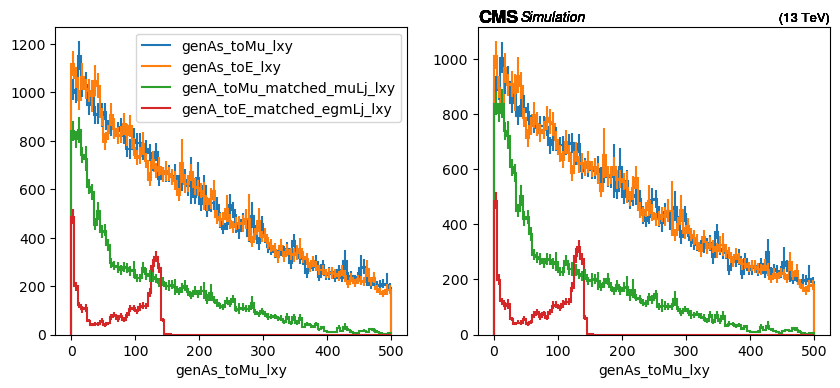

In [4]:
ch1 = "baseNoLj"
ch2 = "baseNoLj_highPtA"

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toMu_lxy"][ch1,:] for name in samples], density=False, ax=ax1)
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toE_lxy"][ch1,:] for name in samples], density=False, ax=ax1)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toMu_matched_muLj_lxy"][ch1,:] for name in samples], density=False, ax=ax1)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:] for name in samples], density=False, ax=ax1)
ax1.legend([
            "genAs_toMu_lxy", 
            "genAs_toE_lxy", 
            "genA_toMu_matched_muLj_lxy", 
            "genA_toE_matched_egmLj_lxy",
           ])
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toMu_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toE_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toMu_matched_muLj_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toE_matched_egmLj_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
ax1.legend([
            "genAs_toMu_lxy", 
            "genAs_toE_lxy", 
            "genA_toMu_matched_muLj_lxy", 
            "genA_toE_matched_egmLj_lxy",
           ])

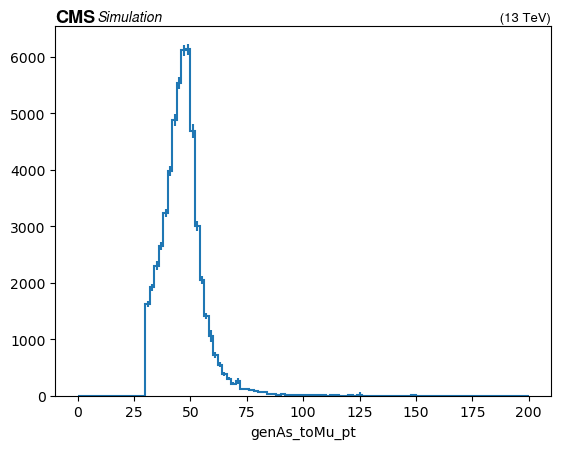

In [12]:
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toMu_pt"][ch2,:] for name in samples], density=Falseb)

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_400mm')

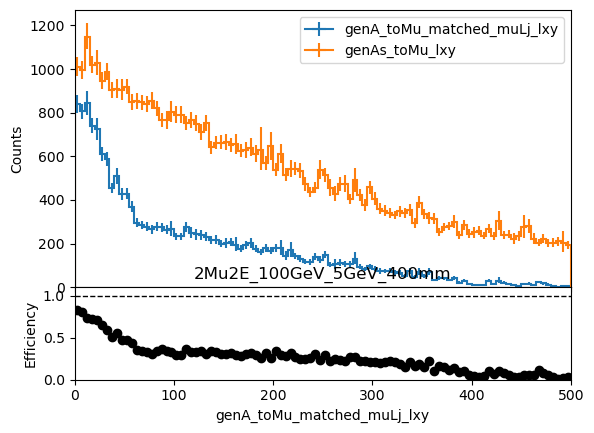

In [5]:
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genAs_toMu_lxy"][ch1,:], 
       rp_num_label="genA_toMu_matched_muLj_lxy",
       rp_denom_label="genAs_toMu_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_400mm")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_400mm')

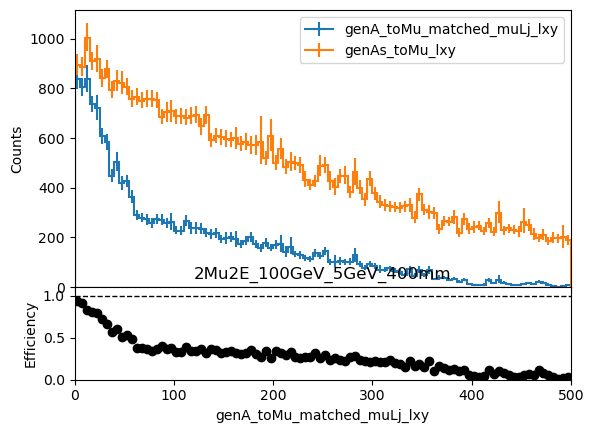

In [6]:
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genAs_toMu_lxy"][ch2,:], 
       rp_num_label="genA_toMu_matched_muLj_lxy",
       rp_denom_label="genAs_toMu_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_400mm")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_400mm')

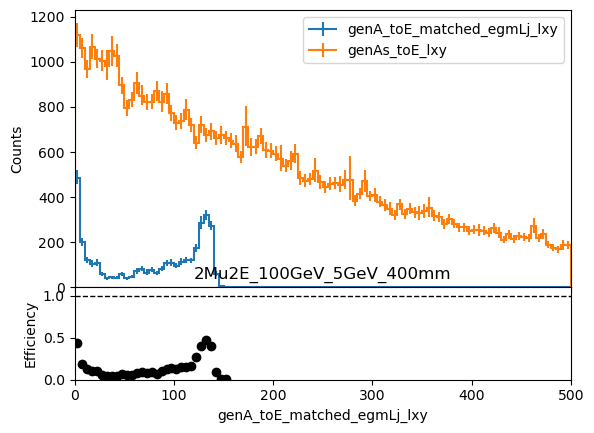

In [7]:
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genAs_toE_lxy"][ch1,:], 
       rp_num_label="genA_toE_matched_egmLj_lxy",
       rp_denom_label="genAs_toE_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_400mm")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_400mm')

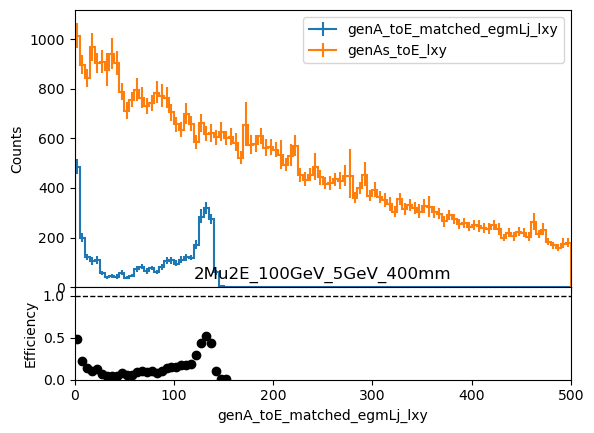

In [22]:
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genAs_toE_lxy"][ch2,:], 
       rp_num_label="genA_toE_matched_egmLj_lxy",
       rp_denom_label="genAs_toE_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_400mm")

Observations made from the following: <br>
1) Efficiency increase for the dark photon decaying to muons
2) Slight increaase for dark photons decaying to electron